## This is our workspace for visualizations!

Add cells, make exploratory graphs, go ham. 

Feel free to do viz stuff in analysis_stats too cause a lot of graphs will probably be embedded in stats.

In [2]:
# feel free to add more

import sqlite3
import numpy as np
import pandas as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import eval_measures
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread


In [3]:
# Create connection to database
conn = sqlite3.connect('../data/db/avocado_project.db')
c = conn.cursor()

In [4]:
list_tables_cmd = "SELECT name FROM sqlite_master WHERE type='table';"
c.execute(list_tables_cmd)
conn.commit()

for row in c:
  print(row)

('demographic',)
('hab2016',)
('hab2017',)
('hab2018',)
('joined_data',)


In [5]:
d = conn.cursor()
pop_cmd = "SELECT boomer_pop, millenial_pop, total_pop, per_cap_avo_sold, year, region FROM joined_data"
d.execute(pop_cmd)
boomer_pop_arr = []
millenial_arr = []
total_pop_arr = []
boomer_percent_arr = []
avo_sold_arr = []
millenial_percentage = []
regions_years = []
estimation_sold_to_boomer = []
estimation_sold_to_millenial = []
region_names = []

num_times = 0
curr_index = 0
millenials_by_region_all_years = [0, 0, 0, 0, 0, 0, 0, 0]
boomers_by_region_all_years = [0, 0, 0, 0, 0, 0, 0, 0]
pop_by_region_all_years = [0, 0, 0, 0, 0, 0, 0, 0]
avg_avo_sales_by_region = [0, 0, 0, 0, 0, 0, 0, 0]
percent_millenial_by_region = [0, 0, 0, 0, 0, 0, 0, 0]


avocado = imread('avocado.png')
avocado_arr = []

for thing in d:
        boomer_pop = thing[0]
        millenial_pop = thing[1]
        total_pop = thing[2]
        per_cap_avo_sold = thing[3]
        year = thing[4]
        region = thing[5]
        percent_millenial = millenial_pop / total_pop
        
        estimation_sold_to_boomer.append((boomer_pop / total_pop) * per_cap_avo_sold)
        
        estimation_sold_to_millenial.append(percent_millenial * per_cap_avo_sold)
        
        boomer_pop_arr.append(boomer_pop)
        millenial_arr.append(millenial_pop)
        total_pop_arr.append(total_pop)
        boomer_percent_arr.append(boomer_pop / total_pop)
        avo_sold_arr.append(per_cap_avo_sold)
        millenial_percentage.append(millenial_pop / total_pop)
        
        regions_years.append(region + " " + str(year))
        avocado_arr.append(avocado)
        
        millenials_by_region_all_years[curr_index] =  millenials_by_region_all_years[curr_index] + millenial_pop
        boomers_by_region_all_years[curr_index] =  boomers_by_region_all_years[curr_index] + boomer_pop
        pop_by_region_all_years[curr_index] =  pop_by_region_all_years[curr_index] + total_pop
        avg_avo_sales_by_region[curr_index] = avg_avo_sales_by_region[curr_index] + per_cap_avo_sold
        percent_millenial_by_region[curr_index] =  percent_millenial_by_region[curr_index] + percent_millenial

        if num_times == 2:
            region_names.append(region)
            num_times = 0
            curr_index += 1
        else :
            num_times += 1

i = 0  

while i < 8 :
    avg_avo_sales_by_region[i] = avg_avo_sales_by_region[i] / 3
    percent_millenial_by_region[i] = percent_millenial_by_region[i] / 3
    i += 1
    
percent_millenial_by_region_with_name = []

i = 0
while i < 8 :
    percent = percent_millenial_by_region[i]
    region = region_names[i]
    percent_millenial_by_region_with_name.append(region + " " + str(round(percent, 3)) + "%")
    i += 1
    
print(avg_avo_sales_by_region)
print(millenials_by_region_all_years)
print(pop_by_region_all_years)
print(region_names)
print(percent_millenial_by_region)
print(percent_millenial_by_region_with_name)


[7.8933333333333335, 4.043333333333333, 4.526666666666666, 4.3500000000000005, 4.83, 8.343333333333334, 4.82, 9.24]
[27590550, 29870837, 24346793, 36961765, 13702711, 27145595, 27567278, 23950502]
[117691155, 140490176, 115204944, 170133225, 63650885, 119311150, 132206057, 106828480]
['California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West']
[0.23443394728443556, 0.21261879182610724, 0.21133620773257697, 0.2172518809715169, 0.21528261238414062, 0.22752747130571693, 0.20852400928427361, 0.2241967480654218]
['California 0.234%', 'Great Lakes 0.213%', 'Midsouth 0.211%', 'Northeast 0.217%', 'Plains 0.215%', 'South Central 0.228%', 'Southeast 0.209%', 'West 0.224%']


[1.8504483875614952, 0.8596882314153174, 0.9566413774163488, 0.945045729603962, 1.0397984903116428, 1.8982697561515975, 1.0050544050338028, 2.071569664568849]
[6.042884945771838, 3.183645101918016, 3.5700252892503177, 3.4049542703960385, 3.790201509688357, 6.445063577181736, 3.8149455949661975, 7.168430335431151]


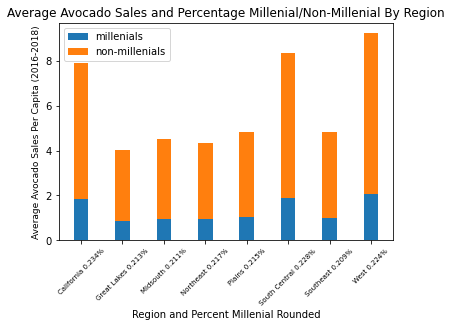

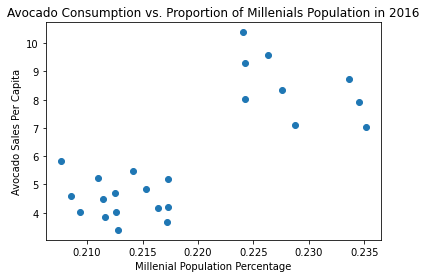

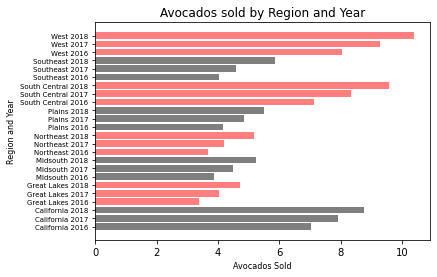

In [6]:
millenials_sales_average = []
non_millenials_sales_average = []

i = 0 

while i < 8 :
    millenials_sales_average.append((millenials_by_region_all_years[i] / pop_by_region_all_years[i]) * avg_avo_sales_by_region[i])
    non_millenials_sales_average.append(((pop_by_region_all_years[i] - millenials_by_region_all_years[i]) / pop_by_region_all_years[i]) * avg_avo_sales_by_region[i])
    i += 1


print(millenials_sales_average)
print(non_millenials_sales_average)

N = 8
width = 0.35
p1 = plt.bar(percent_millenial_by_region_with_name, millenials_sales_average, width)
p2 = plt.bar(percent_millenial_by_region_with_name, non_millenials_sales_average, width, bottom=millenials_sales_average)

plt.ylabel('Average Avocado Sales Per Capita (2016-2018)', fontsize=9)
plt.title('Average Avocado Sales and Percentage Millenial/Non-Millenial By Region')
plt.xlabel('Region and Percent Millenial Rounded')
plt.xticks(fontsize=7, rotation=45)


plt.legend((p1[0], p2[0]), ('millenials', 'non-millenials'))
plt.show()

plt.scatter(millenial_percentage, avo_sold_arr)
plt.title('Avocado Consumption vs. Proportion of Millenials Population in 2016')
plt.xlabel('Millenial Population Percentage')
plt.ylabel('Avocado Sales Per Capita')
plt.show()

plt.barh(regions_years, avo_sold_arr, height=0.8, align='center', alpha=0.5, color=['black', 'black', 'black', 'red', 'red', 'red','black', 'black', 'black', 'red', 'red', 'red', 'black', 'black', 'black', 'red', 'red', 'red', 'black', 'black', 'black', 'red', 'red', 'red'])
#plt.yticks(y_pos, region_years)
plt.yticks(fontsize=7)
plt.xlabel('Avocados Sold', fontsize=8)
plt.ylabel('Region and Year', fontsize=8)
plt.title('Avocados sold by Region and Year')
plt.show()